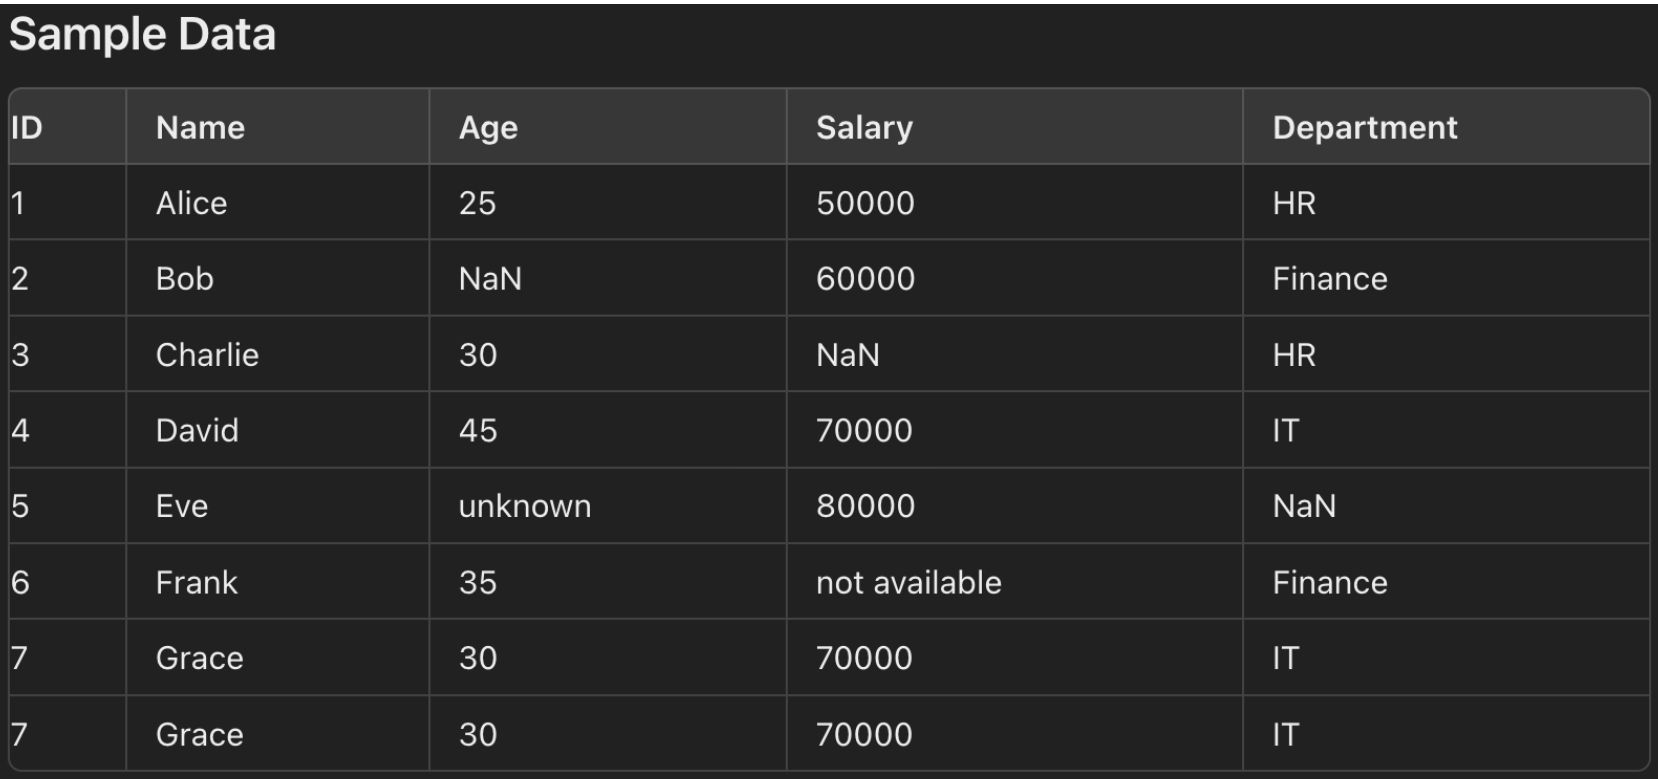

In [5]:
from IPython.display import Image 
Image("/Users/samirsitaula/Desktop/BDA70/week1/sampleImageData.png")

In [3]:
#load Dataset
import pandas as pd
import numpy as np

data = { 
    'ID': [1, 2, 3, 4, 5, 6, 7, 7],
    'Name': [ 'Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Grace'],
    'Age' : [25, np.nan, 30, 45, 'unknown', 35, 30, 30],
    'Salary' : [50000, 60000, np.nan, 70000, 80000, 'not available', 70000, 70000],
    'Department': ['HR', 'Finance', 'HR', 'IT', np.nan, 'Finance', 'IT', 'IT']
}
df = pd.DataFrame(data)
df
#display First few rows
df.head(6)
df.describe()

        

,ID
count,8.000000
mean,4.375000
std,2.263846
min,1.000000
25%,2.750000
50%,4.500000
75%,6.250000
max,7.000000


In [7]:
#identify missing values
missing_values = df.isnull().sum()
missing_values

ID            0
Name          0
Age           1
Salary        1
Department    1
dtype: int64

In [9]:
#handle missing values
#fill missing values in the name column with 'unknown'
df['Department'].fillna('Unknown', inplace=True) #fillna finds nan and replaces with given string values
df.head(8)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce') #find unknown and replace with nan
df.head(8)
#changing salary--> unknown to nan
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df

#changing departments--> unknown to nan
df['Department'].fillna('Unknown', inplace=True)# fillna() ->
df


/var/folders/x4/pz6j4t3n2pj3bkp3pmg9qnhc0000gn/T/ipykernel_43110/1812591607.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Department'].fillna('Unknown', inplace=True) #fillna finds nan and replaces with given string values
/var/folders/x4/pz6j4t3n2pj3bkp3pmg9qnhc0000gn/T/ipykernel_43110/1812591607.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because th

,ID,Name,Age,Salary,Department
0,1,Alice,25.0,50000.0,HR
1,2,Bob,NaN,60000.0,Finance
2,3,Charlie,30.0,NaN,HR
3,4,David,45.0,70000.0,IT
4,5,Eve,NaN,80000.0,Unknown
5,6,Frank,35.0,NaN,Finance
6,7,Grace,30.0,70000.0,IT
7,7,Grace,30.0,70000.0,IT


In [43]:
#convert data types, age and salary columns to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce') #pd.to_numeric()
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df

,ID,Name,Age,Salary,Department
0,1,Alice,25.0,50000.0,HR
1,2,Bob,NaN,60000.0,Finance
2,3,Charlie,30.0,NaN,HR
3,4,David,45.0,70000.0,IT
4,5,Eve,NaN,80000.0,Unknown
5,6,Frank,35.0,NaN,Finance
6,7,Grace,30.0,70000.0,IT
7,7,Grace,30.0,70000.0,IT


In [11]:
#remove duplicates, based on ID column
df = df.drop_duplicates(subset='ID')# drop_duplicates(subset='Employee Code')
df.head(10)


,ID,Name,Age,Salary,Department
0,1,Alice,25.0,50000.0,HR
1,2,Bob,NaN,60000.0,Finance
2,3,Charlie,30.0,NaN,HR
3,4,David,45.0,70000.0,IT
4,5,Eve,NaN,80000.0,Unknown
5,6,Frank,35.0,NaN,Finance
6,7,Grace,30.0,70000.0,IT


In [13]:
#handling outliers
from scipy import stats
# Calculate Z-scores
df['Salary_zscore'] = stats.zscore(df['Salary'].fillna(df['Salary'].mean()))

#define a threshold for outliers
threshold = 3

#identify outliers
df_outliers = df[df['Salary_zscore'].abs() > threshold]

#remove outliers
df_cleaned = df[df['Salary_zscore'].abs() <= threshold]

# Display the DataFrames for outliers and cleaned data 
df_outliers, df_cleaned



/var/folders/x4/pz6j4t3n2pj3bkp3pmg9qnhc0000gn/T/ipykernel_43110/2816532343.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary_zscore'] = stats.zscore(df['Salary'].fillna(df['Salary'].mean()))


(Empty DataFrame
 Columns: [ID, Name, Age, Salary, Department, Salary_zscore]
 Index: [],
    ID     Name   Age   Salary Department  Salary_zscore
 0   1    Alice  25.0  50000.0         HR      -1.856382
 1   2      Bob   NaN  60000.0    Finance      -0.696143
 2   3  Charlie  30.0      NaN         HR       0.000000
 3   4    David  45.0  70000.0         IT       0.464095
 4   5      Eve   NaN  80000.0    Unknown       1.624334
 5   6    Frank  35.0      NaN    Finance       0.000000
 6   7    Grace  30.0  70000.0         IT       0.464095)

In [19]:
#validate Data
validate_data = df_cleaned[df_cleaned['Age'] > 0]
valid_data = df_cleaned[df_cleaned['Salary'] > 0]

#Display the validated data
valid_data


,ID,Name,Age,Salary,Department,Salary_zscore
0,1,Alice,25.0,50000.0,HR,-1.856382
1,2,Bob,NaN,60000.0,Finance,-0.696143
3,4,David,45.0,70000.0,IT,0.464095
4,5,Eve,NaN,80000.0,Unknown,1.624334
6,7,Grace,30.0,70000.0,IT,0.464095
